In [1]:
import LoadingDataset
import utils
import models
import config

GPUs Avaliable[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]:


In [2]:
X_train, X_test ,y_train , y_test = LoadingDataset.loading_imgs( \
                        IMG_DIR=config.IMG_DIR, IMG_SIZE=config.IMG_SIZE, data_type=config.data_type, show_detail=False)

100%|███████████████████████████████████████████████████████████████████████████████| 854/854 [00:00<00:00, 872.77it/s]


In [3]:
model = models.create_model(config.model_name, config.data_class, config.IMG_SIZE, config.show_detail)

MobileNet Model Created.
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 Data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                             

In [4]:
history,predictions = models.run_through(model, X_train, y_train, X_test, y_test, \
                                         lr=config.learning_rate, epochs=config.epochs, BATCH_SIZE=config.batch_size)

# # If want to do it step by step use the code below
# model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= learning_rate),loss = tf.keras.losses.binary_crossentropy, metrics=["accuracy"])
# loss0,accuracy0 = model.evaluate(x=X_test,y=y_test,batch_size=BATCH_SIZE)
# print("initial loss: {:.2f}".format(loss0))
# print("initial accuracy: {:.2f}".format(accuracy0))
# history = model.fit(x=X_train, y=y_train, epochs=epochs, validation_data=(X_test,y_test), batch_size=BATCH_SIZE, shuffle=True)
# predictions = model.predict(x=X_test)

9/9 [==============================] - 5s 120ms/step - loss: 0.8516 - accuracy: 0.4008
initial loss: 0.85
initial accuracy: 0.40
Epoch 1/5
19/19 [==============================] - 9s 288ms/step - loss: 0.9721 - accuracy: 0.5343 - val_loss: 0.8025 - val_accuracy: 0.5019
Epoch 2/5
19/19 [==============================] - 5s 265ms/step - loss: 0.9583 - accuracy: 0.5561 - val_loss: 0.7141 - val_accuracy: 0.6420
Epoch 3/5
19/19 [==============================] - 5s 252ms/step - loss: 0.8904 - accuracy: 0.6064 - val_loss: 0.6840 - val_accuracy: 0.6498
Epoch 4/5
19/19 [==============================] - 5s 258ms/step - loss: 0.8845 - accuracy: 0.5930 - val_loss: 0.6858 - val_accuracy: 0.6537
Epoch 5/5
9/9 [==============================] - 1s 72ms/step


              precision    recall  f1-score   support

      Benign       0.50      0.84      0.62        91
   Malignant       0.86      0.54      0.66       166

    accuracy                           0.64       257
   macro avg       0.68      0.69      0.64       257
weighted avg       0.73      0.64      0.65       257



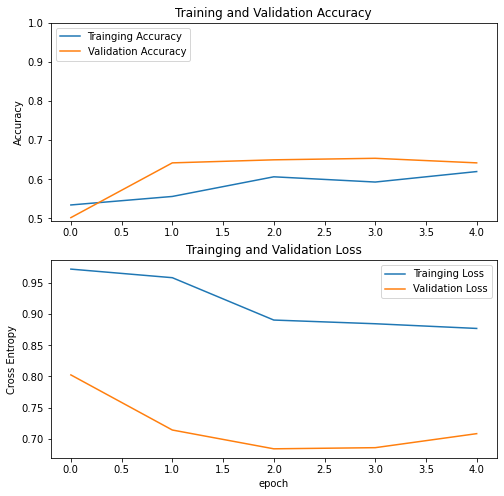

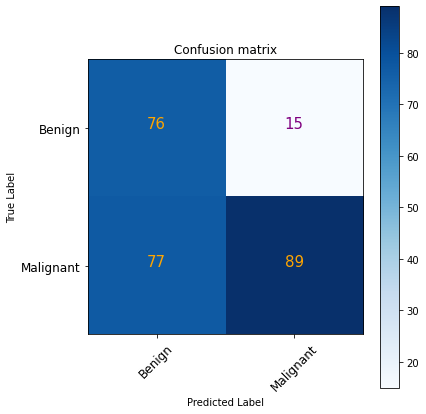

In [5]:
models.show_performance(history, predictions, X_train, y_train, X_test, y_test, classes=config.data_class,\
                        show_detail=config.show_detail,save_in_csv=True, note="Testing if fuction working properly")

In [6]:
# utils.show_report(-1,show_plot=True)